<img src='1111.jpg'>

In [62]:
#pip install pycaret

In [27]:
import pandas as pd

In [28]:
#Regression AutoMl

In [29]:
from pycaret.regression import*

In [30]:
df=pd.read_csv('train.csv')

In [31]:
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13393 non-null  int64  
 1   store_sales(in millions)    13393 non-null  float64
 2   unit_sales(in millions)     13393 non-null  float64
 3   total_children              13393 non-null  float64
 4   num_children_at_home        13393 non-null  float64
 5   avg_cars_at home(approx).1  13393 non-null  float64
 6   gross_weight                13393 non-null  float64
 7   recyclable_package          13393 non-null  float64
 8   low_fat                     13393 non-null  float64
 9   units_per_case              13393 non-null  float64
 10  store_sqft                  13393 non-null  float64
 11  coffee_bar                  13393 non-null  float64
 12  video_store                 13393 non-null  float64
 13  salad_bar                   133

In [33]:
abs(df.corr(numeric_only=True)['cost'].sort_values(ascending=True))

video_store                   0.126914
prepared_food                 0.113281
florist                       0.113276
salad_bar                     0.113038
store_sqft                    0.057676
coffee_bar                    0.052281
unit_sales(in millions)       0.020210
store_sales(in millions)      0.014536
total_children                0.011394
gross_weight                  0.009283
id                            0.007971
units_per_case                0.006677
recyclable_package            0.002043
low_fat                       0.013299
num_children_at_home          0.017569
avg_cars_at home(approx).1    0.021917
cost                          1.000000
Name: cost, dtype: float64

In [17]:
x=df[["video_store","prepared_food","florist","salad_bar","store_sqft","cost"]]


In [18]:
x

,video_store,prepared_food,florist,salad_bar,store_sqft,cost
0,0.0,0.0,0.0,0.0,36509.0,62.09
1,0.0,0.0,0.0,0.0,28206.0,121.80
2,0.0,0.0,0.0,0.0,21215.0,83.51
3,0.0,0.0,0.0,0.0,21215.0,66.78
4,1.0,1.0,1.0,1.0,27694.0,111.51
...,...,...,...,...,...,...
13387,1.0,1.0,1.0,1.0,27694.0,66.27
13388,0.0,0.0,1.0,0.0,23598.0,131.81
13389,0.0,0.0,0.0,0.0,21215.0,135.80
13390,0.0,0.0,1.0,0.0,23598.0,131.81


In [36]:
df= df.dropna(subset=['cost'])

In [37]:
setup(data=df,target='cost')

,Description,Value
0,Session id,2124
1,Target,cost
2,Target type,Regression
3,Original data shape,"(13392, 17)"
4,Transformed data shape,"(13392, 17)"
5,Transformed train set shape,"(9374, 17)"
6,Transformed test set shape,"(4018, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [38]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,25.2103,854.2038,29.2241,0.0503,0.3120,0.2913,1.2740
ada,AdaBoost Regressor,25.4920,861.0919,29.3421,0.0427,0.3132,0.2942,0.1420
lightgbm,Light Gradient Boosting Machine,25.2541,868.2889,29.4634,0.0348,0.3141,0.2919,0.4010
rf,Random Forest Regressor,25.2684,875.0625,29.5774,0.0273,0.3148,0.2913,4.5540
lr,Linear Regression,25.5159,879.3566,29.6515,0.0223,0.3169,0.2963,0.0320
ridge,Ridge Regression,25.5158,879.3586,29.6515,0.0223,0.3169,0.2962,0.0300
br,Bayesian Ridge,25.5155,879.5207,29.6542,0.0222,0.3170,0.2963,0.0370
lar,Least Angle Regression,25.5209,879.6177,29.6559,0.0220,0.3170,0.2963,0.0300
lasso,Lasso Regression,25.6477,884.3585,29.7356,0.0169,0.3181,0.2981,0.0290
llar,Lasso Least Angle Regression,25.6477,884.3585,29.7356,0.0169,0.3181,0.2981,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [39]:
#auto ml ile sonuç çıkmadı
#deep learning ile deneyelim

In [40]:
!pip install tensorflow

In [41]:
import tensorflow as tf

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
x=df.drop('cost', axis=1)
y=df[["cost"]]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [48]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
84/84 [==============================] - 4s 6ms/step - loss: 4174.4019 - val_loss: 1277.6294
Epoch 2/300
84/84 [==============================] - 0s 3ms/step - loss: 1339.8447 - val_loss: 1247.6162
Epoch 3/300
84/84 [==============================] - 0s 3ms/step - loss: 1340.4447 - val_loss: 1270.6266
Epoch 4/300
84/84 [==============================] - 0s 3ms/step - loss: 1334.6183 - val_loss: 1246.4099
Epoch 5/300
84/84 [==============================] - 0s 3ms/step - loss: 1330.3323 - val_loss: 1247.8762
Epoch 6/300
84/84 [==============================] - 0s 3ms/step - loss: 1325.3173 - val_loss: 1264.1691
Epoch 7/300
84/84 [==============================] - 0s 3ms/step - loss: 1338.5968 - val_loss: 1287.4020
Epoch 8/300
84/84 [==============================] - 0s 3ms/step - loss: 1342.8949 - val_loss: 1500.5619
Epoch 9/300
84/84 [==============================] - 0s 3ms/step - loss: 1340.6003 - val_loss: 1245.5553
Epoch 10/300
84/84 [==============================] - 0

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 19)                323       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 19)                380       
                                                                 
 dense_9 (Dense)             (None, 19)                380       
                                                                 
 dense_10 (Dense)            (None, 19)                380       
                                                                 
 dense_11 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1863 (7.28 KB)
Trainable params: 1863 (7

In [50]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

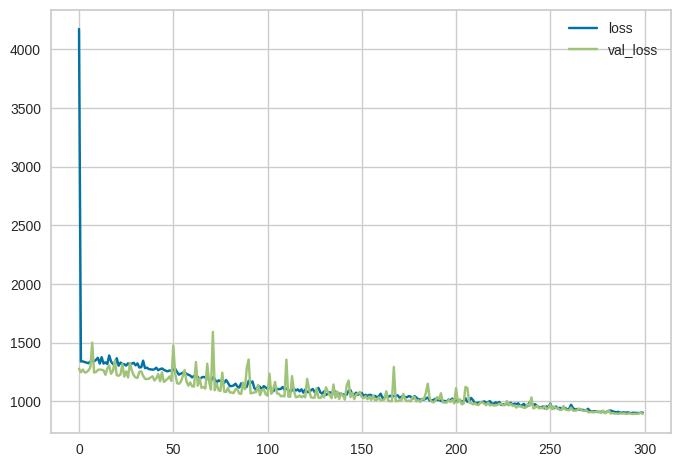

In [51]:
loss_df.plot()

In [52]:
tahmin=model.predict(x_test)

84/84 [==============================] - 1s 5ms/step


In [53]:
from sklearn.metrics import mean_squared_error,r2_score

In [54]:
r2_score(y_test,tahmin)

0.0009760878818559915

In [55]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1300)

Epoch 1/1300
84/84 [==============================] - 1s 7ms/step - loss: 904.2383 - val_loss: 912.7271
Epoch 2/1300
84/84 [==============================] - 0s 5ms/step - loss: 908.8187 - val_loss: 898.1884
Epoch 3/1300
84/84 [==============================] - 0s 5ms/step - loss: 904.0589 - val_loss: 900.0566
Epoch 4/1300
84/84 [==============================] - 0s 5ms/step - loss: 904.1374 - val_loss: 893.7112
Epoch 5/1300
84/84 [==============================] - 0s 5ms/step - loss: 906.2292 - val_loss: 895.0731
Epoch 6/1300
84/84 [==============================] - 0s 5ms/step - loss: 901.5757 - val_loss: 893.3795
Epoch 7/1300
84/84 [==============================] - 0s 5ms/step - loss: 903.2769 - val_loss: 897.1829
Epoch 8/1300
84/84 [==============================] - 0s 6ms/step - loss: 900.5612 - val_loss: 893.9908
Epoch 9/1300
84/84 [==============================] - 1s 7ms/step - loss: 902.5112 - val_loss: 897.4704
Epoch 10/1300
84/84 [==============================] - 1s 7ms/st

In [56]:
tahmin=model.predict(x_test)

84/84 [==============================] - 0s 4ms/step


In [57]:
r2_score(y_test,tahmin)

0.015107492583730453

In [58]:
loss_df=pd.DataFrame(model.history.history)

In [60]:
import matplotlib.pyplot as plt

In [1]:
#SONUÇ ÇIKMADI TEKRAR YAPILACAK